# **Credit Card Fraud Detection**

> **Source:**https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?datasetId=310&sortBy=voteCount

#  **About Dataset**


**Context**

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content**

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

**Acknowledgements**

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project



## Data Preparation

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

#regression packages
import sklearn.linear_model as lm

# Classifiers（algorithm for classification）

from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectFromModel

#model validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# scaling data
from sklearn.preprocessing import StandardScaler, RobustScaler

#model evaluation
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import precision_recall_fscore_support


#f_regression (feature selection)
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

# recursive feature selection (feature selection)
from sklearn.feature_selection import RFE

# dealing with imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek
#other packages
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

### Data Inspection

In [44]:
# import file
df=pd.read_csv('/content/drive/My Drive/Materials/CreditRiskPrediction/creditcard.csv')
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [45]:
# data inspection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

* From above result, we can see that there are 284,807 rows and 31 columns, all of the column values are numberical values.

In [46]:
# double check if there is any missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

* There is no missing values for all columns.

In [47]:
#identify duplicate rows
duplicateRows = df[df.duplicated()]
#view duplicate rows
duplicateRows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


In [48]:
# check the duplicate rows of Class=1
duplicateRows.loc[duplicateRows['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
102442,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102443,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102444,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102445,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
102446,68207.0,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,-0.391540,...,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1.00,1
141258,84204.0,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,...,1.066550,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,0.00,1
141260,84204.0,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1
143334,85285.0,-7.030308,3.421991,-9.525072,5.270891,-4.024630,-2.865682,-6.989195,3.791551,-4.622730,...,1.103398,-0.541855,0.036943,-0.355519,0.353634,1.042458,1.359516,-0.272188,0.00,1
143336,85285.0,-6.713407,3.921104,-9.746678,5.148263,-5.151563,-2.099389,-5.937767,3.578780,-4.684952,...,0.954272,-0.451086,0.127214,-0.339450,0.394096,1.075295,1.649906,-0.394905,252.92,1
150661,93853.0,-6.185857,7.102985,-13.030455,8.010823,-7.885237,-3.974550,-12.229608,4.971232,-4.248307,...,2.502772,0.481691,0.480958,0.360319,-0.293354,-0.199193,-0.203917,0.398927,44.90,1


In [49]:
# drop duplicates
df=df.drop_duplicates(keep = 'first')

In [50]:
# describe the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,94811.077600,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,88.472687,0.001667
std,47481.047891,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,250.399437,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54204.750000,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,5.600000,0.000000
50%,84692.500000,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,22.000000,0.000000
75%,139298.000000,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,77.510000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


In [51]:
# check data size
df.shape

(283726, 31)

* After dropping the duplicates, we get 283,726 rows and 31 columns. However, the values are not on a same scale. As for the transaction amount, the highest amount is 250.12 while the lowest is 88.34. The column "Amount" and "Time" need to be scaled.

In [52]:
# check the how many credit fraud transactions
colors = ['lightblue','red']
names=["Genuine Transaction","Credit Card Fraud"]

fraud= df["Class"].value_counts().tolist()
values = [fraud[0], fraud[1]]
fig = go.Figure(data = go.Pie(values = df['Class'].value_counts(),
                               labels = names, hole = 0.6,
                               pull = [0,0.25,0,0],
                               marker_colors = colors ))
fig.update_traces(hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig.update_layout(
                   title_text = 'Genuine transactions and Credit Card Fraud',
                   title_font = dict(size=25,family='Verdana',
                                     color='darkred'))
fig.show()

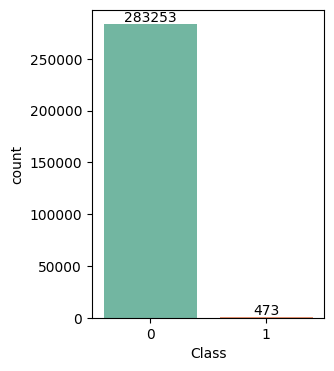

In [53]:
# plot how many cases are fraud and how many are not
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df,palette="Set2")
for item in ax.containers:
    ax.bar_label(item,)

In [54]:
print('True Transactions accounts for', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Credit Card Fraud accounts for', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

True Transactions accounts for 99.83 % of the dataset
Credit Card Fraud accounts for 0.17 % of the dataset


* We can see that this dataset is an imbalanced dataset with only 0.17% are identified as credit card fraud.

### Data Standardization

> **Standardization**:
* Standardization of a dataset is a common requirement for many machine learning estimators. Typically this is done by removing the mean and scaling to unit variance. However, outliers can often influence the sample mean / variance in a negative way. In such cases, the median and the interquartile range often give better results.
* **RobustScaler** of sklearn removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).
* If the dataset contain outliers, RobustScaler is generally a better choice compared to StandardScaler or other scaling techniques that rely on the mean and standard deviation.

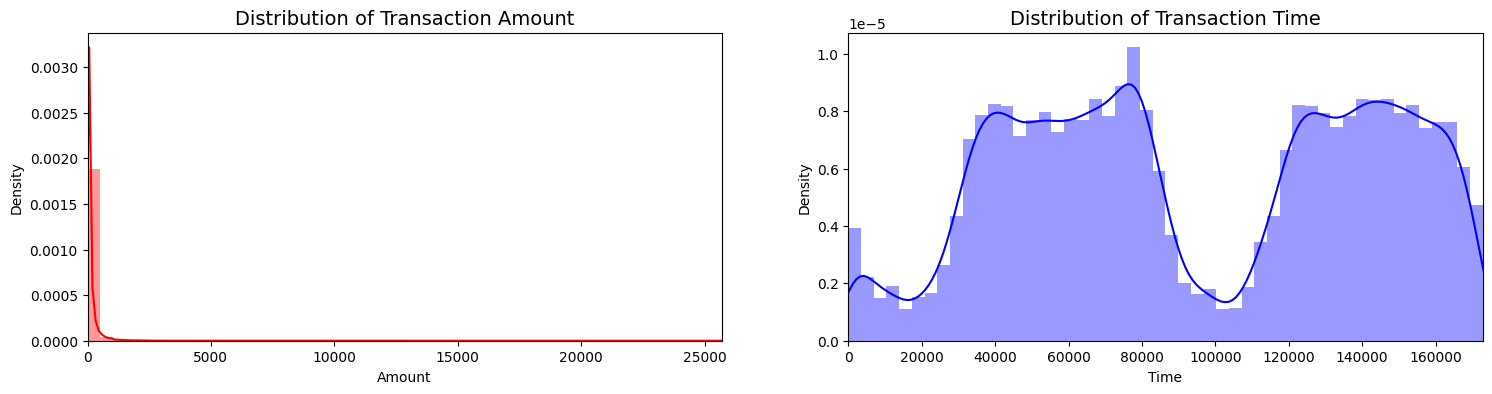

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['Amount'], ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(df['Amount']), max(df['Amount'])])

sns.distplot(df['Time'], ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(df['Time']), max(df['Time'])])

plt.show()

* From the above plot, we can observe that the concentration of the amount is on the smaller values, while the transaction time varies significantly. Therefore, it is necessary to scale them.

In [56]:
# scale the columns "amount" & "time"(standarization of the data)

robust_scaler = RobustScaler()

df['amount'] = robust_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['time'] = robust_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# drop unscaled columns
df.drop(['Time','Amount'], axis=1, inplace=True)

In [57]:
# check the data again
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,amount,time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


* Since the data doesn’t follow a normal distribution,we will utilize the statistical method known as the **interquartile range (IQR)** to calculate the outlier data points, as opposed to employing the Z-score. With the IQR approach, outlier data points are those that fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR. Q1 represents the 25th percentile, Q3 stands for the 75th percentile of the dataset, and IQR denotes the interquartile range calculated by subtracting Q1 from Q3 (Q3 – Q1).

In [58]:
# define a fucntion of IQR
numeric_columns = (list(df.loc[:, 'V1':'V28']))

def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []

    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers
        outlier_list.extend(outlier_list_column)

    # selecting observations containing more than x outliers
    outlier_list = Counter(outlier_list)
    multiple_outliers = list( k for k, v in outlier_list.items() if v > n )

    # Calculate the number of records below and above lower and above bound value respectively
    out1 = df[df[column] < Q1 - outlier_step]
    out2 = df[df[column] > Q3 + outlier_step]

    print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])

    return multiple_outliers

In [59]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numeric_columns)

# dropping outliers
df_out = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 30094


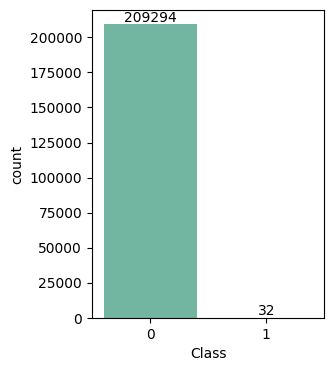

In [60]:
# check the count number of 2 classes again
plt.figure(figsize=(3,4))
ax = sns.countplot(x='Class',data=df_out,palette="Set2")
for i in ax.containers:
    ax.bar_label(i,)

In [61]:
# check the data size
df.shape

(283726, 31)

* The cleaned data has 283,726 rows and 31 columns.

## Correlation Analysis

In [62]:
# correlation analysis
columns = df.columns
df[columns].corr()['Class']

V1       -0.094486
V2        0.084624
V3       -0.182322
V4        0.129326
V5       -0.087812
V6       -0.043915
V7       -0.172347
V8        0.033068
V9       -0.094021
V10      -0.206971
V11       0.149067
V12      -0.250711
V13      -0.003897
V14      -0.293375
V15      -0.003300
V16      -0.187186
V17      -0.313498
V18      -0.105340
V19       0.033631
V20       0.021486
V21       0.026357
V22       0.004887
V23      -0.006333
V24      -0.007210
V25       0.003202
V26       0.004265
V27       0.021892
V28       0.009682
Class     1.000000
amount    0.005777
time     -0.012359
Name: Class, dtype: float64

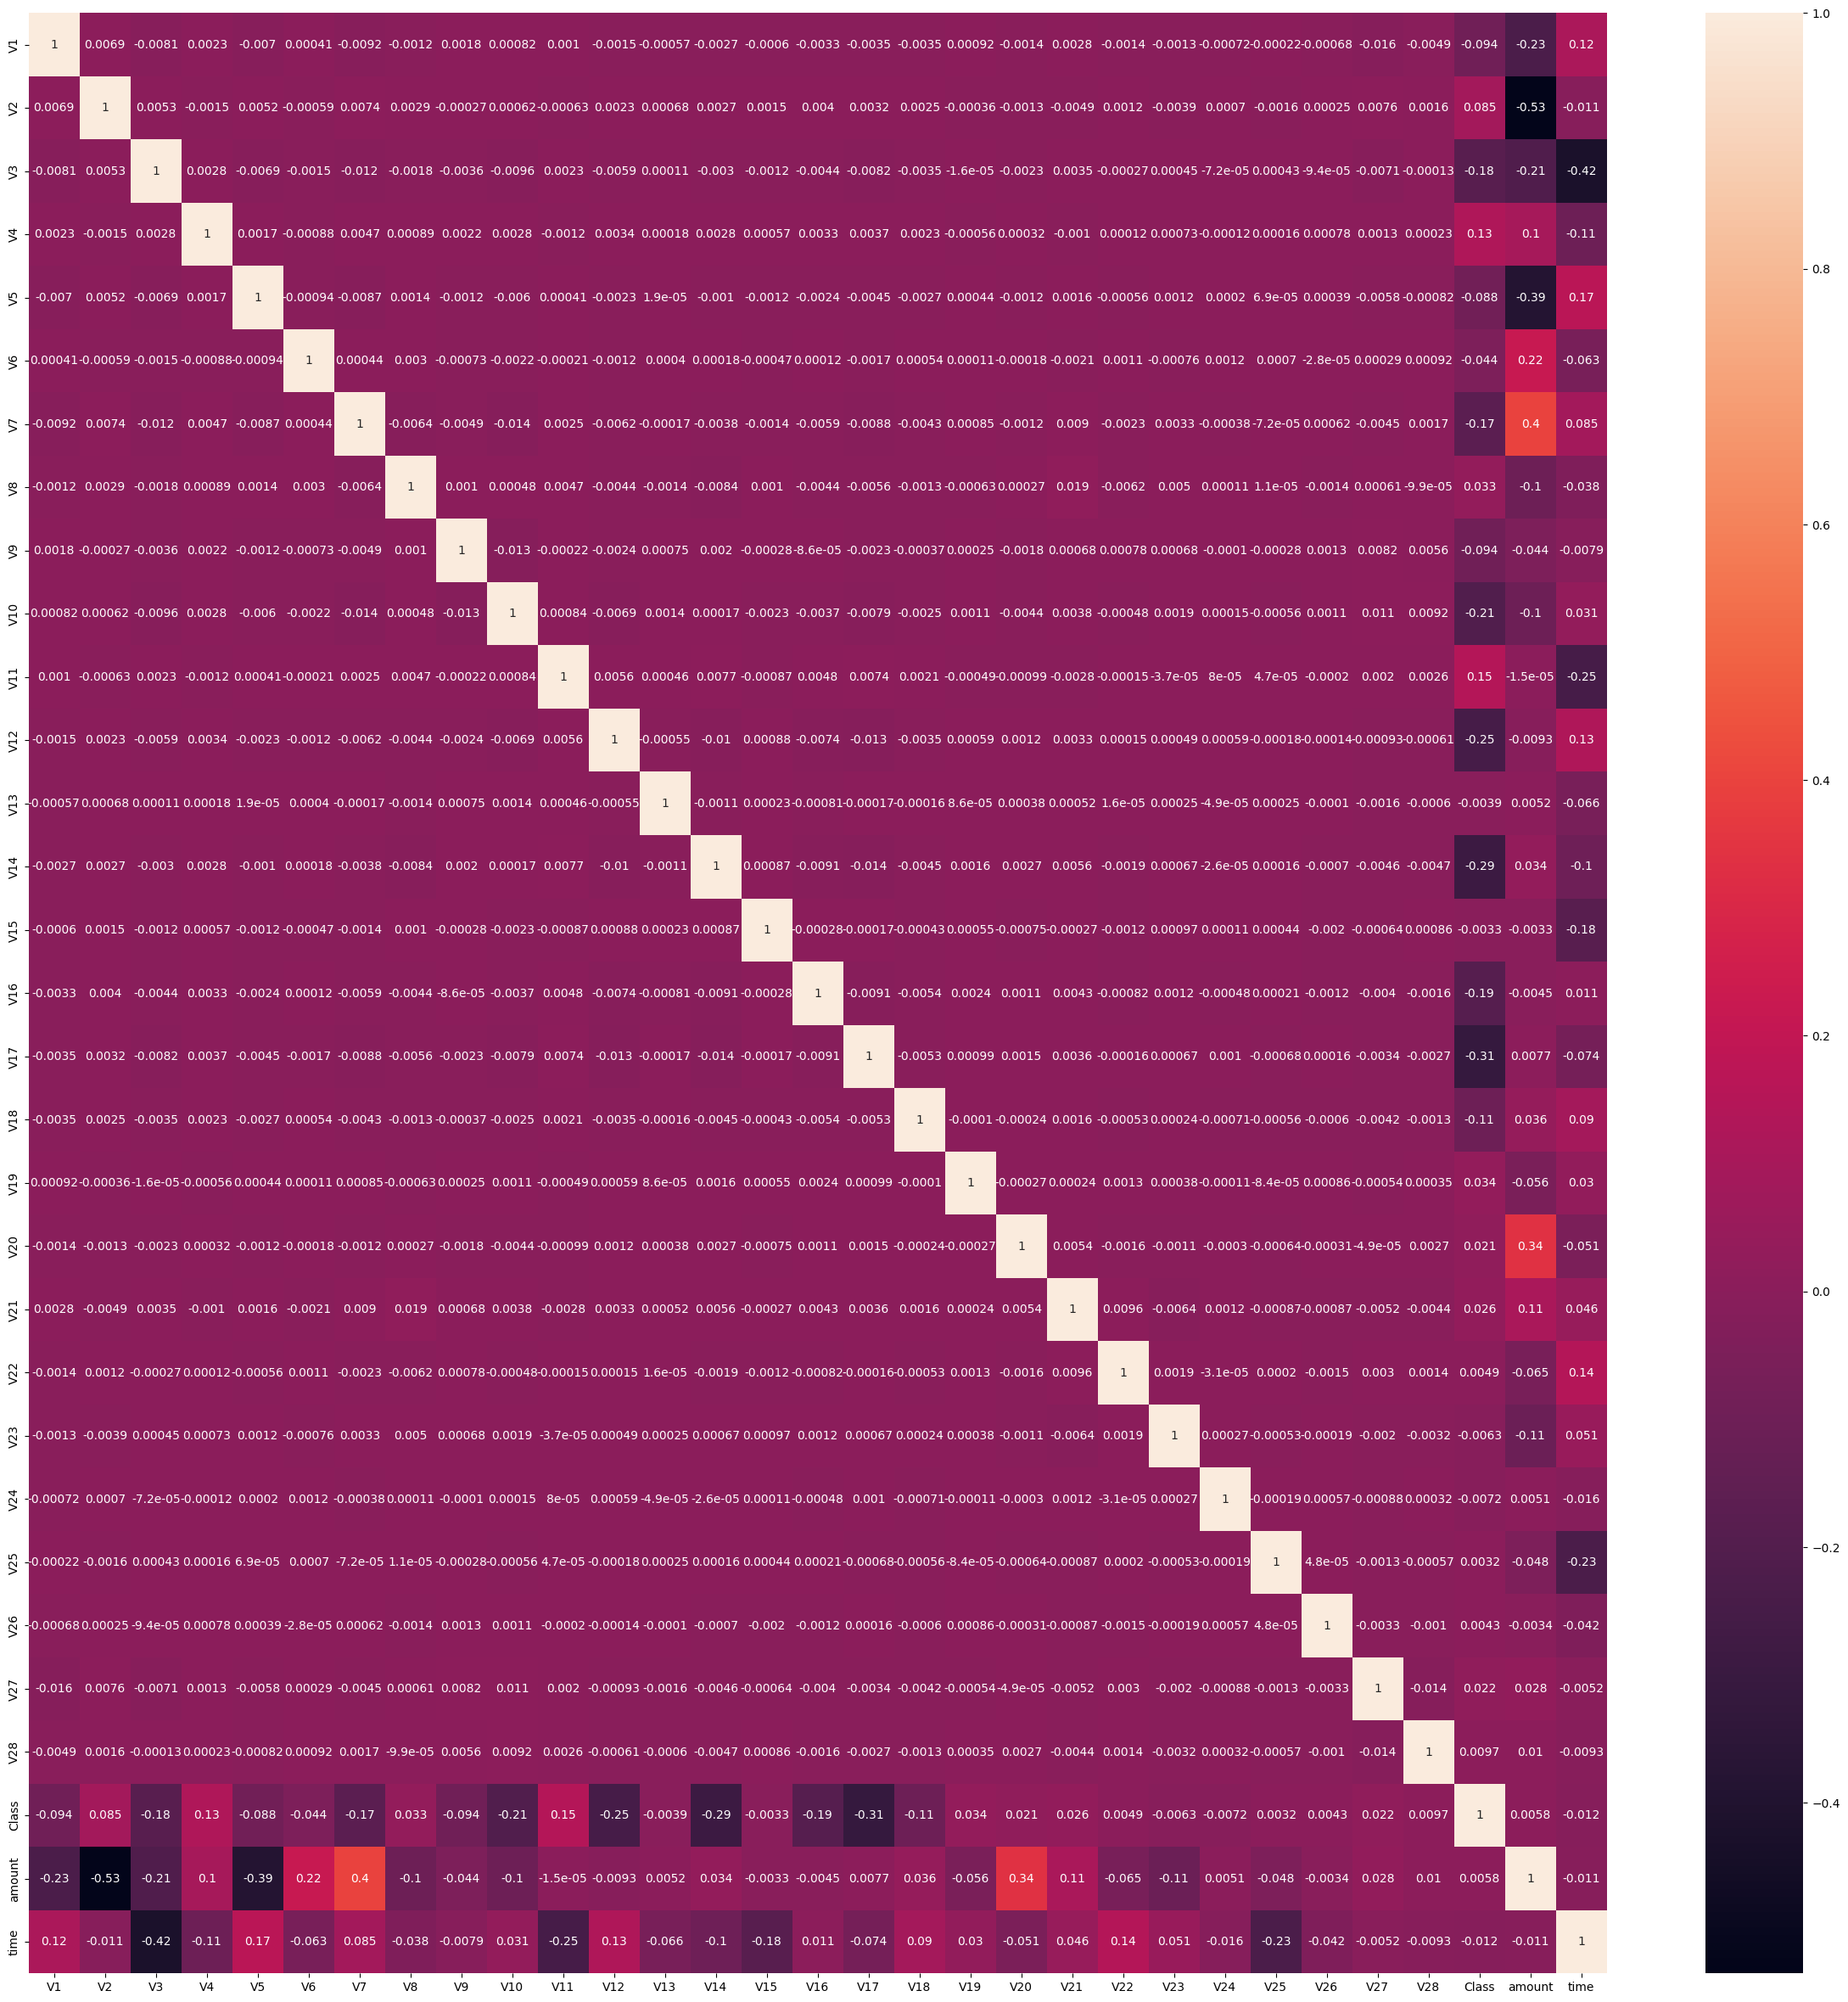

In [63]:
# correlation heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df[columns].corr(), annot=True);

* From the above correlation analysis, we can see that transaction amount has highly negative correlation with V2 and V5 and highly positive correlation with V7 and V20.Time has highly negative correlation with V3.Class has highly negative correlation with V17.

## Modeling

When building a predictive model, we split the original data into two datasets: **training dataset and testing (validation) dataset**. This is called **"split validation"**, a type of **"model validation"**
- A predictive model is built using the **training dataset** and **the model quality** is assessed as the model is applied into the **testing (validation) dataset**

> **Two types of model validation**:
 * **split validation** (70% of the original data as training and the other 30% as testing dataset)
 * **cross validation** (90% of the original data as training and the other 10% as testing dataset):  The basic idea is that, rather than testing the model quality **only once**, cross validation (or 10-fold CV) tests the model **10 times** with 10 different testing datasets.This allows to test the model quality 10 times. The average value is used to measure the model performance.
 - How?
- The training (or original) dataset is randomly partitioned into 10 equal sized subsamples (see the figure below).
- At each time, one subsample is set aside as the **testing** or **validation dataset** and the other 9 subsamples are used as the training dataset.
- A model is built using the training dataset and tested with the testing dataset. This is done 10 times.
- This leads to 10 evaluation scores (mean squared error). The final score is based on the average of the scores.

<img src="https://chrisjmccormick.files.wordpress.com/2013/07/10_fold_cv.png">

 > **Stratified Splitting**
 * Stratified splitting means that when you generate a training / validation dataset split, it will attempt to keep the same percentages of classes in each split.

 > We use **Stratified Split Validation** in our model validation part.


In [64]:
# declare X variables and y variable
y = df['Class']
X = df.drop('Class', axis=1)

> This dataset is an **imbalanced dataset**, with **209294 Non-fraud** and **32 Fraud**. If we build the model directly, the model with identify most of the transcrtions, as the **majority are Non-Fraud**. Here are some common ways of handling imbalanced dataset.

### Handling imbalanced data
There are many ways of dealing with imbalanced data, like:
- Random Oversampling
- Random Undersampling
- SMOTE: Synthetic Minority Over-Sampling Technique
- Ensemble with Undersampling

Here considering the computation and model accuracy we use **SMOTE method** .

#### SMOTE: Synthetic Minority Over-Sampling Technique

**SMOTE** (Synthetic Minority Oversampling Technique) is employed to synthesize elements for the minority class. The method functions by selecting examples that are closely situated in the feature space, creating a line between these examples, and generating a new sample at a point along that line.


In [65]:
# smote oversampling
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    283253
1    283253
Name: Class, dtype: int64

In [66]:
# split validation
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, stratify=y_sm,test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(396554, 30) (396554,) (169952, 30) (169952,)


#####  Decision Tree

In [67]:
#Initialize DecisionTreeClassifier()
dt = DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)
# Train a decision tree model
dt.fit(X_train, y_train)

dt_y = dt.predict(X_test)

In [68]:
#Model evaluation
# http://scikit-learn.org/stable/modules/model_evaluation.html
print(metrics.accuracy_score(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.confusion_matrix(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print(metrics.roc_auc_score(y_test, dt.predict(X_test)))

0.9338224910562982
--------------------------------------------------------
[[80783  4193]
 [ 7054 77922]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     84976
           1       0.95      0.92      0.93     84976

    accuracy                           0.93    169952
   macro avg       0.93      0.93      0.93    169952
weighted avg       0.93      0.93      0.93    169952

--------------------------------------------------------
0.9338224910562982


In [69]:
# Feature importance from the Decision Tree
importance_dt = dt.feature_importances_
# Print feature importance
for i, imp in enumerate(importance_dt):
    print(f"Feature {i+1}: {imp}")

Feature 1: 0.0
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.05416704824505281
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 0.01639755180711297
Feature 9: 0.0
Feature 10: 0.010049036168149112
Feature 11: 0.0
Feature 12: 0.0
Feature 13: 0.0
Feature 14: 0.9193863637796851
Feature 15: 0.0
Feature 16: 0.0
Feature 17: 0.0
Feature 18: 0.0
Feature 19: 0.0
Feature 20: 0.0
Feature 21: 0.0
Feature 22: 0.0
Feature 23: 0.0
Feature 24: 0.0
Feature 25: 0.0
Feature 26: 0.0
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0
Feature 30: 0.0


* From the result above, we can see that V4, V8, V10, and V14 are the most important features.

##### Using L1 Regularization (Lasso Regression) with Logistic Regression

* For logistic regression, one common method for feature selection is to use L1 regularization (Lasso regression). The L1 penalty can shrink some of the coefficients to zero, effectively selecting a subset of features.

In [70]:
# Fit the original Logistic Regression
lr = LogisticRegression(solver='lbfgs', max_iter=500)
lr.fit(X_train, y_train)

# Extract coefficients
coefficients = lr.coef_[0]

# Set a threshold
threshold = 0.5

# Select features with coefficients larger than the threshold
selected_features = [feature for feature, coeff in zip(X_train.columns, coefficients) if abs(coeff) > threshold]

print(f"Selected features: {selected_features}")

Selected features: ['V1', 'V2', 'V4', 'V5', 'V6', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V20', 'V22', 'V23', 'V26', 'V28', 'amount', 'time']


* Lasso Regression includes 20 features and exclude 20 features.

In [71]:
#Model evaluation

print(metrics.accuracy_score(y_test, lr.predict(X_test)))
print(metrics.confusion_matrix(y_test, lr.predict(X_test)))
print(metrics.classification_report(y_test, lr.predict(X_test)))
print(metrics.roc_auc_score(y_test, lr.predict(X_test)))

0.9471321314253436
[[82817  2159]
 [ 6826 78150]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     84976
           1       0.97      0.92      0.95     84976

    accuracy                           0.95    169952
   macro avg       0.95      0.95      0.95    169952
weighted avg       0.95      0.95      0.95    169952

0.9471321314253436


#####  Random Forest

In [72]:
# initialize random forest
clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
# train a random forest
clf=clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9998940877424214

In [73]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, clf.predict(X_test))) #overall accuracy
print(metrics.confusion_matrix(y_test, clf.predict(X_test)))
print(metrics.classification_report(y_test, clf.predict(X_test)))
print(metrics.roc_auc_score(y_test, clf.predict(X_test)))

0.9998940877424214
[[84960    16]
 [    2 84974]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       1.00      1.00      1.00     84976

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952

0.9998940877424215


In [74]:
# Feature importance from the Random Forest
importance_rf = clf.feature_importances_

# Get sorted feature indices based on importance
sorted_indices = importance_rf.argsort()[::-1]

# Print and rank the sorted feature importance
for rank, i in enumerate(sorted_indices, 1):
    print(f"Rank {rank} - Feature {i+1}: {importance_rf[i]}")

Rank 1 - Feature 14: 0.23371660287529616
Rank 2 - Feature 12: 0.14807041703472815
Rank 3 - Feature 10: 0.0974835782811057
Rank 4 - Feature 4: 0.08768936068081236
Rank 5 - Feature 11: 0.08213905016688243
Rank 6 - Feature 16: 0.06238954481963388
Rank 7 - Feature 18: 0.03997170880527441
Rank 8 - Feature 7: 0.030744736405069428
Rank 9 - Feature 17: 0.028862522311051596
Rank 10 - Feature 27: 0.01695708016585331
Rank 11 - Feature 1: 0.016703051256100748
Rank 12 - Feature 29: 0.01469801168380101
Rank 13 - Feature 8: 0.013772047047546965
Rank 14 - Feature 3: 0.011171778150195166
Rank 15 - Feature 9: 0.011052218634341086
Rank 16 - Feature 2: 0.010260498349116394
Rank 17 - Feature 5: 0.008896210294125555
Rank 18 - Feature 13: 0.008568495576875456
Rank 19 - Feature 19: 0.008299127675193842
Rank 20 - Feature 26: 0.0074510453417705545
Rank 21 - Feature 30: 0.00719650871085737
Rank 22 - Feature 6: 0.006947951184371472
Rank 23 - Feature 23: 0.006927085542936156
Rank 24 - Feature 28: 0.006281756479445

* From above result, we can see that V14, V4, V17 and V12 are 4 most important features.

### Model Evaluation

*  https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/

#### **Introduction of Different Metrics**

> **Threshold Metrics for Imbalanced Classification**
* **Accuracy** = Correct Predictions / Total Predictions
* **Error** = Incorrect Predictions / Total Predictions

> **Sensitivity-Specificity Metrics**
* **Sensitivity** = TruePositive / (TruePositive + FalseNegative)
* **Specificity** = TrueNegative / (FalsePositive + TrueNegative)

> **Precision-Recall Metrics**
* **Precision** = TruePositive / (TruePositive + FalsePositive)
* **Recall** = TruePositive / (TruePositive + FalseNegative)
  - Precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.The F-Measure is a popular metric for imbalanced classification.
* **F-Measure** = (2 * Precision * Recall) / (Precision + Recall)

> **Ranking Metrics for Imbalanced Classification**
- The most commonly used ranking metric is the **ROC Curve or ROC Analysis**.


#### **How to Choose the Metrics**
Source:https://machinelearningmastery.com/tour-of-evaluation-metrics-for-imbalanced-classification/


- Is the positive class more important?
-- Use Precision-Recall AUC

- Are you predicting class labels?
-- Is the positive class more important?
- Are False Negatives and False Positives Equally Important?
-- Use F1-Measure
- Are False Negatives More Important?
-- Use F2-Measure





> **So, which metric to choose?**

In our analysis, we place particular emphasis on the model's accuracy in identifying the fraud **Class 1**, because if we fail to correctly identify fraud cases it can lead to significant economic losses for the company.

Additionally, we consider ***precision, recall, F-score, and accuracy*** in our evaluation. However, we pay special attention to recall and F-score as recall is an indicator for detecting false negative and F-score is a balanced combination of precision and recall.

In [75]:
print("Decision Tree Model Evaluation")
print(metrics.classification_report(y_test, dt.predict(X_test)))
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Logistic Regression Model Evaluation")
print(metrics.classification_report(y_test, lr.predict(X_test)))
print("--------------------------------------------------------")
print("--------------------------------------------------------")
print("Random Forest Model Evaluation")
print(metrics.classification_report(y_test, clf.predict(X_test)))

Decision Tree Model Evaluation
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     84976
           1       0.95      0.92      0.93     84976

    accuracy                           0.93    169952
   macro avg       0.93      0.93      0.93    169952
weighted avg       0.93      0.93      0.93    169952

--------------------------------------------------------
--------------------------------------------------------
Logistic Regression Model Evaluation
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     84976
           1       0.97      0.92      0.95     84976

    accuracy                           0.95    169952
   macro avg       0.95      0.95      0.95    169952
weighted avg       0.95      0.95      0.95    169952

--------------------------------------------------------
--------------------------------------------------------
Random Forest Model Evaluation
              preci

* From above result, we can see that the random forest has the best performance with 100% accuracy, however, it's too good to be true. Considering the computation cost, we need to think twice for choosing this model. The second best model is Logistic Regression, with 95% accuracy and 95% f1-score. So **Logistic Regression** is the best model among the three models.


## Summary

* From above result, we can see that the random forest has the best performance with 100% accuracy, however, it's too good to be true. Considering the computation cost, we need to think twice for choosing this model. The second best model is Logistic Regression, with 95% accuracy and 95% f1-score. So **Logistic Regression** is the best model among the three models.
**V14 and V4** are two most important features among the 30 features.
* V4 has positive correlation with whether the transaction is fraud or not and it has positive correlation with transction amount and negative correlation with time.
* V14 has negative correlation with whether the transaction is fraud or not and has negative correlation with time and positive correlation with transction amount.